In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv('/content/btc_6hSignals.csv')

In [2]:
data.head()

,datetime,open,high,low,close,volume,SMASig,EMASig,MeanRevSig,FinalSig
0,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13558.99,2421.241182,0,0,0,0
1,2018-01-01 11:30:00,13539.00,13818.55,13001.13,13220.56,1876.934392,0,0,0,0
2,2018-01-01 17:30:00,13220.56,13330.00,12750.00,13022.00,2427.898747,0,0,0,0
3,2018-01-01 23:30:00,13007.87,13599.70,12940.00,13380.00,1883.841523,0,0,0,0
4,2018-01-02 05:30:00,13382.16,13850.00,12890.02,13166.95,3957.954564,0,0,0,0


In [3]:
# Assuming you have a function to generate signals from your ML model
def generate_signals(row):
    # Replace this with your actual ML model's signal generation logic
    # For demonstration purposes, generating random signals (1: Buy, -1: Sell, 0: Hold)

    return row['FinalSig']


def calculate_transaction_costs(trades):
    return trades * 0.0015  # 0.15%

def calculate_slippage(trades):
    return trades * 0.005  # 0.5%

def dynamic_stoploss(entry_price, current_price, highest_price):
    stop_loss_percent = 4
    take_profit_percent = 10

    if current_price < entry_price * (1 - stop_loss_percent / 100):
        return entry_price * (1 - stop_loss_percent / 100)
    elif current_price > entry_price * (1 + take_profit_percent / 100):
        highest_price = max(highest_price, current_price)
        return highest_price * (1 - stop_loss_percent / 100)
    else:
        return highest_price * (1 - stop_loss_percent / 100)

# Function to append transaction details to a CSV file
def append_to_csv(filename, data):
    with open(filename, 'a') as f:
        f.write(data + '\n')

def apply_risk_management(data, initial_wallet_balance, output_csv_filename):
    wallet_balance = initial_wallet_balance
    holdings = 0
    count = 0
    highest_price_reached = 0

    low_risk_mode_threshold = 0.85
    low_risk_mode = True
    transaction_data = f"S.no,Action,Holdings,No. of BTC,Price,Stop Loss,Wallet Balance, Date & Time"
    append_to_csv(output_csv_filename, transaction_data)

    for index, row in data.iterrows():
        signal = generate_signals(row)
        # Check if the wallet balance is in low-risk or high-risk mode
        if wallet_balance >= low_risk_mode_threshold * initial_wallet_balance:
            low_risk_mode = True
        else:
            low_risk_mode = False

        # Buy signal Buy signal Buy signal

        if signal > 0 and wallet_balance > 0 and holdings / initial_wallet_balance < 0.3:
          if wallet_balance >= row['open']:
            if low_risk_mode:
              if signal==2:
                btc_to_buy = (wallet_balance/row['open'])
                stop_loss_price = row['open'] * 0.96  # 4% below entry

                wallet_balance -= btc_to_buy * row['open']
                holdings += btc_to_buy
                transaction_costs = calculate_transaction_costs(btc_to_buy)
                slippage_costs = calculate_slippage(btc_to_buy)
                wallet_balance -= transaction_costs + slippage_costs

                highest_price_reached = row['open']
                print("holdings",holdings)
                count = count + 1
                print(f"{count}, Action : Buy, Holdings : N/A, No. of BTC: {btc_to_buy}, Price {row['open']}, Stop Loss: {stop_loss_price}, Wallet balance: {wallet_balance}, Date & Time: {row['datetime']}")
                # Append transaction details to CSV
                transaction_data = f"{count},Buy,N/A,{btc_to_buy},{row['open']},{stop_loss_price},{wallet_balance},{row['datetime']}"
                append_to_csv(output_csv_filename, transaction_data)
              else:
                btc_to_buy = (0.002 * wallet_balance) / row['open']
                stop_loss_price = row['open'] * 0.96  # 4% below entry

                wallet_balance -= btc_to_buy * row['open']
                holdings += btc_to_buy
                transaction_costs = calculate_transaction_costs(btc_to_buy)
                slippage_costs = calculate_slippage(btc_to_buy)
                wallet_balance -= transaction_costs + slippage_costs

                highest_price_reached = row['open']
                # print("holdings",holdings)
                count = count + 1
                print(f"{count}, Action: Buy, Holdings : N/A, No. of BTC: {btc_to_buy}, Price {row['open']}, Stop Loss: {stop_loss_price}, Wallet balance: {wallet_balance}, Date & Time: {row['datetime']}")
                # Append transaction details to CSV
                transaction_data = f"{count},Buy,N/A,{btc_to_buy},{row['open']},{stop_loss_price},{wallet_balance},{row['datetime']}"
                append_to_csv(output_csv_filename, transaction_data)
            else:
              if signal==2:
                btc_to_buy = (0.5 *wallet_balance/row['open'])
                stop_loss_price = row['open'] * 0.96  # 4% below entry

                wallet_balance -= btc_to_buy * row['open']
                holdings += btc_to_buy
                transaction_costs = calculate_transaction_costs(btc_to_buy)
                slippage_costs = calculate_slippage(btc_to_buy)
                wallet_balance -= transaction_costs + slippage_costs

                highest_price_reached = row['open']
                # print("holdings",holdings)
                count = count + 1
                print(f"{count}, Action : Buy, Holdings : N/A, No. of BTC: {btc_to_buy}, Price {row['open']}, Stop Loss: {stop_loss_price}, Wallet balance: {wallet_balance}, Date & Time: {row['datetime']}")
                # Append transaction details to CSV
                transaction_data = f"{count},Buy,N/A,{btc_to_buy},{row['open']},{stop_loss_price},{wallet_balance}, {row['datetime']}"
                append_to_csv(output_csv_filename, transaction_data)
              else:
                continue
          else:
            print("Low Balance........ Can't buy BTC......")
            if holdings > 0:
              wallet_balance += holdings * data['close'].iloc[-1]  # Sell at the last closing price
              transaction_costs = calculate_transaction_costs(holdings)
              slippage_costs = calculate_slippage(holdings)
              wallet_balance -= transaction_costs + slippage_costs

              count = count + 1
              print(f"{count}, Action : Sell, Holdings : {holdings}, No. of BTC: N/A, Price {row['close']},  Stop Loss: {stop_loss_price}, Wallet balance: {wallet_balance}, Date & Time: {row['datetime']}")
              # Append transaction details to CSV
              transaction_data = f"{count},Sell,{holdings},N/A,{row['close']},{stop_loss_price},{wallet_balance},{row['datetime']}"
              append_to_csv(output_csv_filename, transaction_data)
              holdings = 0
            break



        # Sell signal
        elif signal < 0 and holdings > 0:
          if low_risk_mode :
            wallet_balance += holdings * row['close']
            transaction_costs = calculate_transaction_costs(holdings)
            slippage_costs = calculate_slippage(holdings)
            wallet_balance -= transaction_costs + slippage_costs

            count = count + 1
            print(f"{count}, Action : Sell, Holdings: {holdings}, No. of BTC: N/A, Price {row['close']}, Stop Loss: {stop_loss_price}, Wallet balance: {wallet_balance}, Date & Time: {row['datetime']}")
            # Append transaction details to CSV
            transaction_data = f"{count},Sell,{holdings},N/A,{row['close']},{stop_loss_price},{wallet_balance},{row['datetime']}"
            append_to_csv(output_csv_filename, transaction_data)
            holdings = 0
          else:
            if signal==-2:

              wallet_balance += holdings * row['close']
              transaction_costs = calculate_transaction_costs(holdings)
              slippage_costs = calculate_slippage(holdings)
              wallet_balance -= transaction_costs + slippage_costs

              count = count + 1
              print(f"{count}, Action : Sell, Holdings: {holdings}, No. of BTC: N/A, Price {row['close']},  Stop Loss: {stop_loss_price}, Wallet balance: {wallet_balance}, Date & Time: {row['datetime']}")
              # Append transaction details to CSV
              transaction_data = f"{count},Sell,{holdings},N/A,{row['close']},{stop_loss_price},{wallet_balance},{row['datetime']}"
              append_to_csv(output_csv_filename, transaction_data)
              holdings = 0
            else:
              continue


        # Update dynamic stop-loss in case of an open position
        if holdings > 0:
            stop_loss_price = dynamic_stoploss(row['close'], row['close'], highest_price_reached)

            # Check if the current price hits the stop-loss
            if row['low'] <= stop_loss_price:
                # print("holdings = ",holdings)
                wallet_balance += holdings * stop_loss_price
                transaction_costs = calculate_transaction_costs(holdings)
                slippage_costs = calculate_slippage(holdings)
                wallet_balance -= transaction_costs + slippage_costs

                count = count + 1
                print(f"{count}, Action : Stop Loss/SLSell, Holdings: {holdings}, No. of BTC: N/A, Price {row['close']},  Stop Loss: {stop_loss_price}, Wallet balance: {wallet_balance}, Date & Time: {row['datetime']}")
                 # Append transaction details to CSV
                transaction_data = f"{count},Stop Loss/SLSell,{holdings},N/A,{row['close']},{stop_loss_price},{wallet_balance},{row['datetime']}"
                append_to_csv(output_csv_filename, transaction_data)
                holdings = 0

    if holdings > 0:
        wallet_balance += holdings * data['close'].iloc[-1]  # Sell at the last closing price
        transaction_costs = calculate_transaction_costs(holdings)
        slippage_costs = calculate_slippage(holdings)
        wallet_balance -= transaction_costs + slippage_costs

        count = count + 1
        print(f"{count}, Action : Stop Loss/SLSell, Holdings: {holdings}, No. of BTC: N/A, Price {row['close']},  Stop Loss: {stop_loss_price}, Wallet balance: {wallet_balance}, Date & Time: {row['datetime']}")
        # Append transaction details to CSV
        transaction_data = f"{count},Stop Loss/SLSell,{holdings},N/A,{row['close']},{stop_loss_price},{wallet_balance},{row['datetime']}"
        append_to_csv(output_csv_filename, transaction_data)
        holdings = 0

    print("Final Wallet Balance:", wallet_balance)
    with open(output_csv_filename, 'a') as f:
        f.close()

# Example usage:
# Load historical BTC/USDT data (replace 'your_data.csv' with your actual data)
#data = pd.read_csv('your_data.csv')

# Set initial wallet balance
initial_wallet_balance = 100000
output_csv_filename='transactions.csv'
# Apply risk management strategy
apply_risk_management(data, initial_wallet_balance, output_csv_filename)


1, Action: Buy, Holdings : N/A, No. of BTC: 0.014503284268722653, Price 13789.98, Stop Loss: 13238.380799999999, Wallet balance: 99799.99990572865, Date & Time: 2018-01-02 23:30:00
2, Action : Sell, Holdings: 0.014503284268722653, No. of BTC: N/A, Price 16960.39, Stop Loss: 13238.380799999999, Wallet balance: 100045.9811689357, Date & Time: 2018-01-05 23:30:00
3, Action: Buy, Holdings : N/A, No. of BTC: 0.012981183491492888, Price 15414.0, Stop Loss: 14797.439999999999, Wallet balance: 99845.88912222013, Date & Time: 2018-01-08 17:30:00
4, Action : Stop Loss/SLSell, Holdings: 0.012981183491492888, No. of BTC: N/A, Price 14699.95,  Stop Loss: 14797.439999999999, Wallet balance: 100037.97732168679, Date & Time: 2018-01-08 17:30:00
5, Action: Buy, Holdings : N/A, No. of BTC: 0.013573858169267806, Price 14739.8, Stop Loss: 14150.207999999999, Wallet balance: 99837.90127881334, Date & Time: 2018-01-08 23:30:00
6, Action: Buy, Holdings : N/A, No. of BTC: 0.013419072752528675, Price 14880.0, 

In [4]:
transactions = pd.read_csv('transactions.csv')
transactions.head(50)

,S.no,Action,Holdings,No. of BTC,Price,Stop Loss,Wallet Balance,Date & Time
0,1,Buy,NaN,0.014503,13789.98,13238.3808,99799.999906,2018-01-02 23:30:00
1,2,Sell,0.014503,NaN,16960.39,13238.3808,100045.981169,2018-01-05 23:30:00
2,3,Buy,NaN,0.012981,15414.00,14797.4400,99845.889122,2018-01-08 17:30:00
3,4,Stop Loss/SLSell,0.012981,NaN,14699.95,14797.4400,100037.977322,2018-01-08 17:30:00
4,5,Buy,NaN,0.013574,14739.80,14150.2080,99837.901279,2018-01-08 23:30:00
5,6,Buy,NaN,0.013419,14880.00,14284.8000,99638.225389,2018-01-09 11:30:00
6,7,Stop Loss/SLSell,0.026993,NaN,14726.00,14284.8000,100023.813833,2018-01-09 11:30:00
7,8,Buy,NaN,0.013585,14726.00,14136.9600,99823.766117,2018-01-09 17:30:00
8,9,Stop Loss/SLSell,0.013585,NaN,14949.98,14136.9600,100015.811752,2018-01-09 17:30:00
9,10,Buy,NaN,0.013380,14949.98,14351.9808,99815.780041,2018-01-09 23:30:00


In [5]:
transactions.columns

Index(['S.no', 'Action', 'Holdings', 'No. of BTC', 'Price', 'Stop Loss',
       'Wallet Balance', ' Date & Time'],
      dtype='object')

In [6]:
type(transactions['Price'])

pandas.core.series.Series

In [7]:
transactions[' Date & Time']

0       2018-01-02 23:30:00
1       2018-01-05 23:30:00
2       2018-01-08 17:30:00
3       2018-01-08 17:30:00
4       2018-01-08 23:30:00
               ...         
1138    2020-05-24 17:30:00
1139    2020-05-24 23:30:00
1140    2020-05-25 05:30:00
1141    2020-05-25 11:30:00
1142    2022-01-31 05:30:00
Name:  Date & Time, Length: 1143, dtype: object

In [8]:
from datetime import datetime
count_gp = 0
count_gl = 0
gp = 0
gl = 0
j = 0
win_trades = []
loss_trades = []
trade_return = []
holding_time = []
neg_ret_arr =[]

# Function to calculate gross profit
def gross_profit(amount):
    global count_gp, gp
    count_gp += 1
    gp += amount

# Function to calculate gross loss
def gross_loss(amount):
    global count_gl, gl
    count_gl += 1
    gl += amount

# Iterate over rows of transactions dataset
for i in range(len(transactions)):
    # Check if the action is 'Sell' or 'Stop Loss/SLSell'
    if transactions['Action'][i] in ['Sell', 'Stop Loss/SLSell']:
        # Store the sell price and the number of BTC
        sell_price = transactions['Price'][i]
        sell_btc = transactions['No. of BTC'][i]

        # Iterate one step backward
        j = i - 1

        # Check if the index is valid and the action is 'Buy'
        while j >= 0 and transactions['Action'][j] == 'Buy':
            # Store the buy price and the number of BTC
            buy_price = transactions['Price'][j]
            buy_btc = transactions['No. of BTC'][j]

            #date and time
            datetime_str1 = transactions[' Date & Time'][i]
            datetime_str2 = transactions[' Date & Time'][j]

            datetime1 = datetime.strptime(datetime_str1, '%Y-%m-%d %H:%M:%S')
            datetime2 = datetime.strptime(datetime_str2, '%Y-%m-%d %H:%M:%S')

            time_difference = (datetime1 - datetime2).total_seconds()
            holding_time.append(time_difference)

            # Calculate the amount
            amount = ((sell_price - buy_price) * buy_btc)

            amt_dev = amount / (buy_price * buy_btc)
            trade_return.append(amt_dev)
            # Determine whether it's a gross profit or gross loss
            if amount > 0:
                win_trades.append(amount)
                gross_profit(amount)

            elif amount < 0:
                neg_ret = amount/(buy_price * buy_btc)
                neg_ret_arr.append(neg_ret)
                loss_trades.append(amount)
                gross_loss(amount)

            # Move one step further backward
            j -= 1

# Print the results

total_closed_trades = transactions.Action.value_counts()['Buy']
print("Total Closed Trades\t:\t", total_closed_trades)
print("Total Profitable Trades\t:\t", count_gp)
print("Total Lossing Trades\t:\t", count_gl)
print("Total Gross Profit\t:\t", "$", gp)
print("Total Gross Loss\t:\t", "$", abs(gl))
print("Average Holding Time\t:\t" , (np.average(holding_time)/3600), "Hrs")
print("Maximum Holding Time\t:\t" , (np.max(holding_time)/3600), "Hrs")

Net_profit = gp + gl
print ("Net Profit\t\t:\t", "$", Net_profit)

avg_win_td = gp / count_gp
print("Average Winning Trade\t:\t", avg_win_td)

avg_lsng_td = gl / count_gl
print("Average Loosing Trade\t:\t", abs(avg_lsng_td))

n = len(transactions) - 1
bnh_return = ((transactions['Price'][n] - transactions['Price'][0]) / transactions['Price'][0]) * 100
print(f"Buy and Hold Return\t:\t", bnh_return, "%")

print("Largest Loosing Trade\t:\t", "$", abs(np.min(loss_trades)))

print("Largest Winning Trade\t:\t", "$", np.max(win_trades))


# trade_returns = [((transactions['Price'][i] - transactions['Price'][i - 1]) * transactions['No. of BTC'][i - 1])
#                  for i in range(1, len(transactions))
#                  if transactions['Action'][i] in ['Sell', 'Stop Loss/SLSell']]

# Standard Deviation of Returns

returns_std = np.std(trade_return)
# Risk-Free Rate (you can replace this with the actual risk-free rate)
risk_free_rate = bnh_return/4  # Assuming 2% for illustration purposes
# Sharpe Ratio Calculation
n = len(transactions) - 1
sharpe_ratio = ((transactions['Price'][n]/transactions['Price'][0]) ** (1/4))/ (returns_std)
# Print the Sharpe Ratio
print("Sharpe Ratio\t\t:\t", sharpe_ratio)

#Calculation of Sortino Ratio
for i in range(len(neg_ret_arr)):
  neg_ret_arr[i] = abs(neg_ret_arr[i])

returns_std1 = np.std(neg_ret_arr)
sortino_ratio = ((transactions['Price'][n]/transactions['Price'][0]) ** (1/4)) / (returns_std1*10)

print("Sortino Ratio\t\t:\t", sortino_ratio)

print("Win Rate\t\t:\t", (count_gp/total_closed_trades)*100, "%")

dip = []
for i in range(len(transactions)):
  if transactions['Action'][i] in ['Sell', 'Stop Loss/SLSell']:
    dip.append(transactions['Price'][i])


max_dip = ((transactions['Price'][0] - np.min(dip)) / transactions['Price'][0]) * 100
print("Max Dip Percentage\t:\t", max_dip, "%")

dip_perct = []
for i in range(0, len(dip)):
  dip_perctge = ((transactions['Price'][0] - dip[i]) / transactions['Price'][0]) * 100
  dip_perct.append(dip_perctge)
avg_dip = np.mean(dip_perct)
print("Average Dip Percentage\t:\t", avg_dip, "%")



Total Closed Trades	:	 881
Total Profitable Trades	:	 353
Total Lossing Trades	:	 528
Total Gross Profit	:	 $ 316288.66656123195
Total Gross Loss	:	 $ 4859.54308241521
Average Holding Time	:	 194.683314415437 Hrs
Maximum Holding Time	:	 14862.0 Hrs
Net Profit		:	 $ 311429.12347881676
Average Winning Trade	:	 896.0018882754446
Average Loosing Trade	:	 9.203680080331837
Buy and Hold Return	:	 168.3227241808908 %
Largest Loosing Trade	:	 $ 41.99166677634306
Largest Winning Trade	:	 $ 308894.65684534
Sharpe Ratio		:	 4.012559806252203
Sortino Ratio		:	 3.64975110112386
Win Rate		:	 40.06810442678774 %
Max Dip Percentage	:	 76.3252738582652 %
Average Dip Percentage	:	 43.28068070976504 %


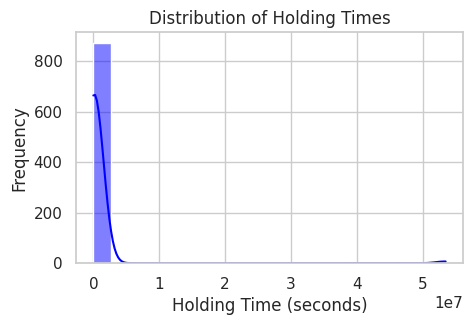

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Visualize the distribution of holding times
plt.figure(figsize=(5, 3))
sns.histplot(holding_time, bins=20, kde=True, color='blue')
plt.title('Distribution of Holding Times')
plt.xlabel('Holding Time (seconds)')
plt.ylabel('Frequency')
plt.show()


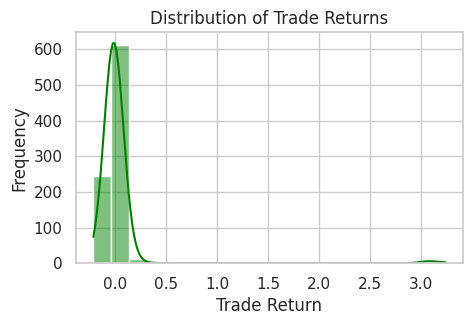

In [10]:

# Visualize the distribution of trade returns
plt.figure(figsize=(5, 3))
sns.histplot(trade_return, bins=20, kde=True, color='green')
plt.title('Distribution of Trade Returns')
plt.xlabel('Trade Return')
plt.ylabel('Frequency')
plt.show()



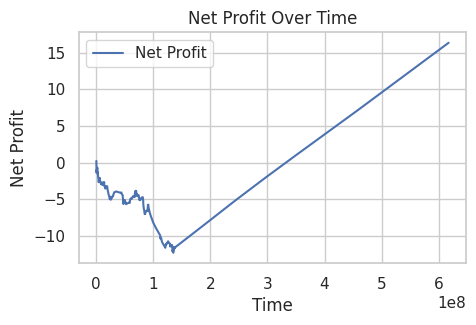

In [11]:

# Visualize the net profit over time
plt.figure(figsize=(5, 3))
plt.plot(np.cumsum(holding_time), np.cumsum(trade_return), label='Net Profit')
plt.title('Net Profit Over Time')
plt.xlabel('Time')
plt.ylabel('Net Profit')
plt.legend()
plt.show()



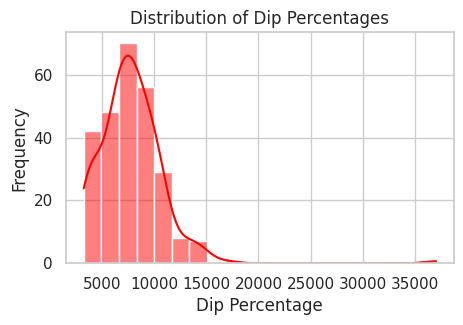

In [12]:

# Visualize the distribution of dip percentages
plt.figure(figsize=(5, 3))
sns.histplot(dip, bins=20, kde=True, color='red')
plt.title('Distribution of Dip Percentages')
plt.xlabel('Dip Percentage')
plt.ylabel('Frequency')
plt.show()

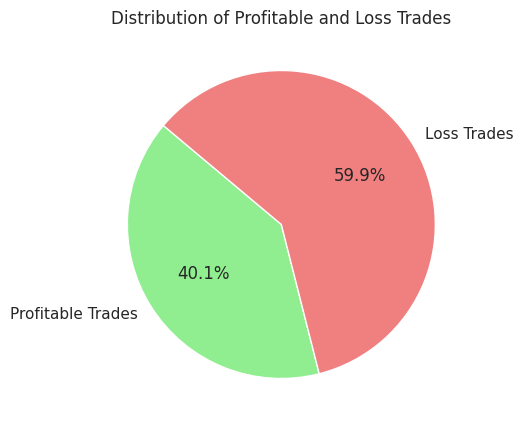

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Pie chart for win/loss trades distribution
labels = ['Profitable Trades', 'Loss Trades']
sizes = [count_gp, count_gl]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Profitable and Loss Trades')
plt.show()

plt.show()